<a href="https://colab.research.google.com/github/deethereal/NN/blob/main/MNIST/MNIST_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf, numpy as np, matplotlib.pyplot as plt
from tensorflow import keras


In [3]:
print(tf.__version__)

2.4.0


In [7]:
MNIST=keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels) = MNIST.load_data()


In [8]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


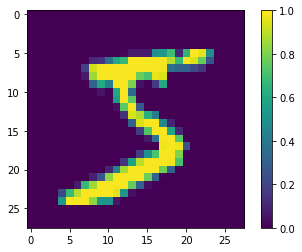

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [68]:
print((test_images[0]))

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [16]:
model=keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)), #flatten преобразует в матрциу 28*28
  keras.layers.Dropout(0.1),
  keras.layers.Dense(128,activation='relu'), #Dense нейронный слой 
  keras.layers.Dropout(0.1),
  keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
model.fit(train_images,train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0391 - accuracy: 0.9869
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0362 - accuracy: 0.9877
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0356 - accuracy: 0.9879
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0346 - accuracy: 0.9883
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0313 - accuracy: 0.9889
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0318 - accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0299 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0300 - accuracy: 0.9898
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0287 - accuracy: 0.9902
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.026

In [33]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nТочность на проверочных данных:', test_acc)

313/313 - 0s - loss: 0.0663 - accuracy: 0.9832

Точность на проверочных данных: 0.9832000136375427


In [20]:
predictions = model.predict(test_images)

5


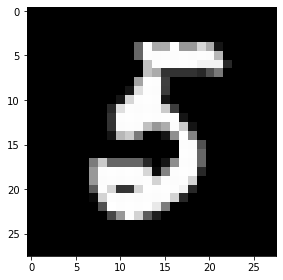

In [78]:
idx=np.random.randint(10000)
print(np.argmax(predictions[idx]))
plt.figure()
imshow(test_images[idx])


In [54]:
from google.colab import drive 
import cv2
from skimage.io import imread,imshow
drive.mount('/content/drive')
%cd "/content/drive/My Drive/digits"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/digits


In [69]:
def pred(path):
  image = cv2.imread(path)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)/255.0
  imshow(gray)
  plt.show()
  gray = (np.expand_dims(gray,0))

  
  return np.argmax(model.predict(gray))


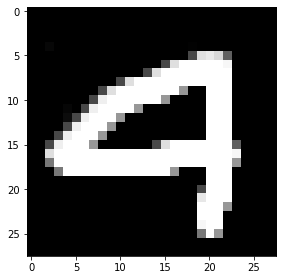

NN thinks this is: 4


In [75]:
ipath='four1.png'

print("NN thinks this is:",pred(ipath))